<p> 
Instalar Bibliotecas: <b>request</b> e <b>BeautifulSoup</b>
</p>

<p>
<b>Request:</b> É uma requisição que o cliente (usuário) faz ao servidor e o servidor retorna as informações que o cliente solicitou atraves do response.
</p>

In [96]:
#!pip install requests ## já instalada nativamente no colab 
#!pip install beautifulSoup4 ## já instalada nativamente no colab

In [97]:
import requests
from bs4 import BeautifulSoup

In [98]:
#User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.107 Safari/537.36
headers = {
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.107 Safari/537.36',
}
# Request da url passada
page = requests.get(
    'https://www.google.com/search?q=pre%C3%A7o+dolar&oq=pre%C3%A7o+dola&aqs=chrome.1.69i57j0i433i512l2j0i512l7.8866j1j7&sourceid=chrome&ie=UTF-8',
    headers=headers
    )

b'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta charset="UTF-8"><meta content="origin" name="referrer"><meta content="Anb2GUnhMjfTIX0D2a4a6NPAqPI5GaxxRAiF81XTjHJ2qK4E3Hw3VFM4eaJBgRzz45CNPt624audv+wHOJwfAAEAAABieyJvcmlnaW4iOiJodHRwczovL2dvb2dsZS5jb206NDQzIiwiZmVhdHVyZSI6IlRydXN0VG9rZW5zIiwiZXhwaXJ5IjoxNjI2MjIwNzk5LCJpc1N1YmRvbWFpbiI6dHJ1ZX0=" http-equiv="origin-trial"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>pre\xc3\xa7o dolar - Google Search</title><script nonce="SZnkQe4pqP2aOXPYNYvzng==">(function(){window.google={kEI:\'MEUHYbSZHqCz5NoPqa6pqA0\',kEXPI:\'31\',kBL:\'ROh1\'};google.sn=\'web\';google.kHL=\'en\';})();(function(){\nvar f=this||self;var h,k=[];function l(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||h}function m(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;return b}\nfunction n(a,
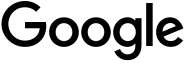

In [99]:
# Imprimindo HTML da página
print(page.content)

In [100]:
scraping = BeautifulSoup(page.content, 'html.parser')

### importante inspecionar o HTML da página para ver como está distribuido as informações que deseja coletar e quais as tags que elas estão.

In [101]:
atributos = {
    'class':'b1hJbf',
}

In [102]:
# Pegando Div do HTML
response = scraping.find_all('div', attrs=atributos)

In [103]:
print(list(response))

[<div class="b1hJbf" data-exchange-rate="0.8424999999999999"><div class="vk_sh c8Zgcf"><span class="DFlfde eNFL1">1</span> <span class="vLqKYe" data-mid="/m/09nqf" data-name="United States Dollar">United States Dollar</span> equals</div><div class="dDoNo ikb4Bb gsrt gzfeS"><span class="DFlfde SwHCTb" data-precision="2" data-value="0.8424999999999999">0.84</span> <span class="MWvIVe" data-mid="/m/02l6h" data-name="Euro">Euro</span></div></div>]


## Valor do dólar em real


In [106]:
atributos = {
    'class':'DFlfde SwHCTb',
}

dolar_real = scraping.find_all('span', attrs=atributos)[0]

In [107]:
print(dolar_real.text)

0.84


<p>
Por algum motivo o valor que está sendo retornado é o valor do Dólar para EURO, mesmo com a conversão do dólar para real... O processo se encontra correto, a váriavel dolar_real recebe o objeto scraping e o metodo find_all com os arguementos span, que é a tag HTML que está a informação do valor do real do dia  refente ao dólar e attrs que recebe a classe do span

</p>

#### Segue a imagem do HTML

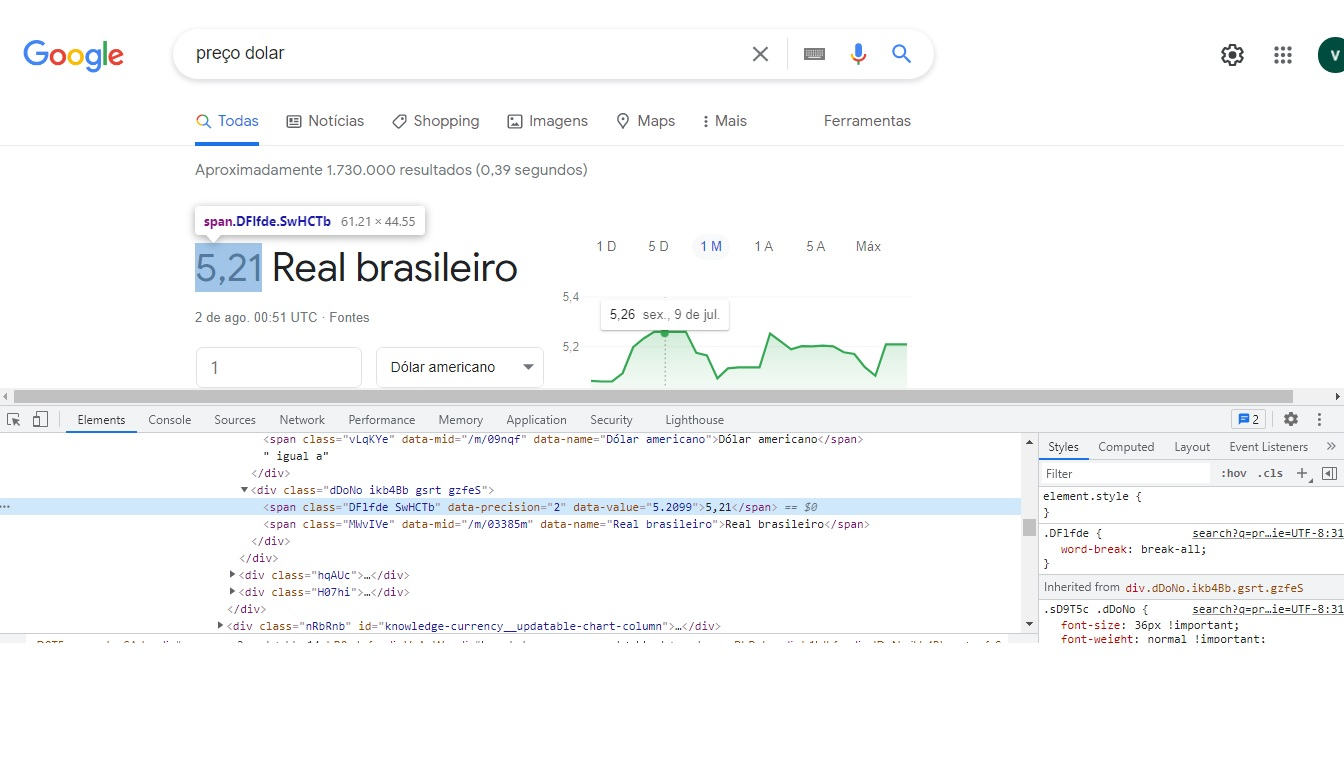